# Classifying Penguins with Decision Trees

Load the penguins dataset - as before, we'll use Seaborn dataset:

In [1]:
import seaborn as sns

In [2]:
penguins_df = sns.load_dataset("penguins")
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
len(penguins_df)

344

In [4]:
penguins_df.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [5]:
penguins_df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
penguins_df = penguins_df.dropna()

In [7]:
len(penguins_df)

333

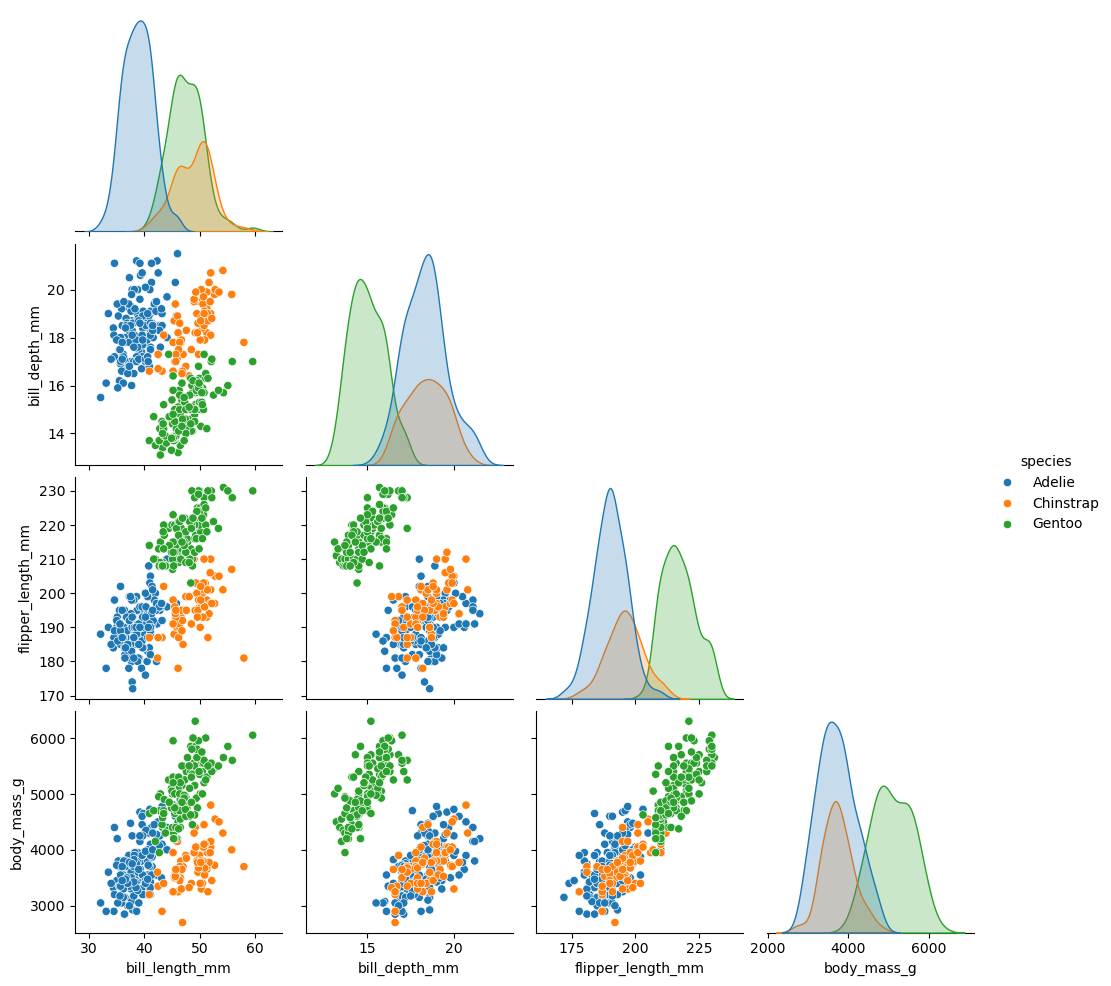

In [8]:
sns.pairplot(data=penguins_df,
             hue="species",
             corner=True)

## Using a Decision Tree Classifier to Predict Penguin Species

In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [9]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### Encode categorical variables

The species, island, and sex variables are strings. This will cause a problem for our decision tree classifier which works with numeric variables. To solve this, we'll need to encode those variables. 

See: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder.fit_transform, https://scikit-learn.org/stable/modules/preprocessing_targets.html and https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder

The species is our label, so we'll use a LabelEncoder for that.

In [12]:
label_encoder = LabelEncoder()
penguins_df['species'] = label_encoder.fit_transform(penguins_df['species'])

In [13]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,0,Torgersen,39.5,17.4,186.0,3800.0,Female
2,0,Torgersen,40.3,18.0,195.0,3250.0,Female
4,0,Torgersen,36.7,19.3,193.0,3450.0,Female
5,0,Torgersen,39.3,20.6,190.0,3650.0,Male


We can convert the male/female values in the sex column using an OrdinalEncoder.

In [14]:
ordinal_encoder = OrdinalEncoder()
penguins_df[['sex']] = ordinal_encoder.fit_transform(penguins_df[['sex']])

In [15]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,1.0
1,0,Torgersen,39.5,17.4,186.0,3800.0,0.0
2,0,Torgersen,40.3,18.0,195.0,3250.0,0.0
4,0,Torgersen,36.7,19.3,193.0,3450.0,0.0
5,0,Torgersen,39.3,20.6,190.0,3650.0,1.0


It probably makes more sense to use a OneHotEncoder for our island column.

In [16]:
one_hot_encoder = OneHotEncoder()

island_encoded = one_hot_encoder.fit_transform(penguins_df[['island']])

The OneHotEncoder has given us a sparse matrix.

In [17]:
island_encoded

<333x3 sparse matrix of type '<class 'numpy.float64'>'
	with 333 stored elements in Compressed Sparse Row format>

Before converting this to a Pandas DataFrame, we need to convert it to a dense array.

In [18]:
island_encoded = island_encoded.toarray()

island_encoded

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

Now we can convert the one-hot encoded 'island' result to a DataFrame.

In [19]:
island_encoded_df = pd.DataFrame(
    island_encoded, columns=one_hot_encoder.get_feature_names_out(['island'])
)

island_encoded_df

,island_Biscoe,island_Dream,island_Torgersen
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
328,1.0,0.0,0.0
329,1.0,0.0,0.0
330,1.0,0.0,0.0
331,1.0,0.0,0.0


We now bring the new one-hot encoded 'island' columns into the original DataFrame and drop the redundant 'island' column.


In [20]:
penguins_df['island_Biscoe'] = island_encoded_df['island_Biscoe']
penguins_df['island_Dream'] = island_encoded_df['island_Dream']
penguins_df['island_Torgersen'] = island_encoded_df['island_Torgersen']
penguins_df = penguins_df.drop(columns=['island'])

In [21]:
penguins_df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,0,39.1,18.7,181.0,3750.0,1.0,0.0,0.0,1.0
1,0,39.5,17.4,186.0,3800.0,0.0,0.0,0.0,1.0
2,0,40.3,18.0,195.0,3250.0,0.0,0.0,0.0,1.0
4,0,36.7,19.3,193.0,3450.0,0.0,0.0,0.0,1.0
5,0,39.3,20.6,190.0,3650.0,1.0,0.0,0.0,1.0


Now when we check out our DataFrame, we'll see that species, island, and sex are now encoded with numeric values.

In [22]:
penguins_df.sample(15)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
244,2,42.9,13.1,215.0,5000.0,0.0,1.0,0.0,0.0
159,1,51.3,18.2,197.0,3750.0,1.0,0.0,1.0,0.0
122,0,40.2,17.0,176.0,3450.0,0.0,0.0,0.0,1.0
181,1,52.8,20.0,205.0,4550.0,1.0,0.0,1.0,0.0
64,0,36.4,17.1,184.0,2850.0,0.0,0.0,0.0,1.0
115,0,42.7,18.3,196.0,4075.0,1.0,0.0,0.0,1.0
311,2,52.2,17.1,228.0,5400.0,1.0,1.0,0.0,0.0
38,0,37.6,19.3,181.0,3300.0,0.0,0.0,1.0,0.0
173,1,48.5,17.5,191.0,3400.0,1.0,0.0,1.0,0.0
314,2,44.5,14.7,214.0,4850.0,0.0,1.0,0.0,0.0


### Define X and y
We now define our features and target variable. X and y are the conventional variable names used for this.

In [23]:
X = penguins_df.drop('species', axis=1)
y = penguins_df['species']

In [24]:
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,1.0,0.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,0.0,0.0,0.0,1.0
2,40.3,18.0,195.0,3250.0,0.0,0.0,0.0,1.0
4,36.7,19.3,193.0,3450.0,0.0,0.0,0.0,1.0
5,39.3,20.6,190.0,3650.0,1.0,0.0,0.0,1.0


In [25]:
y.head()

0    0
1    0
2    0
4    0
5    0
Name: species, dtype: int32

### Split the dataset into training and testing sets
For this we can use the train_test_split function.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42)

In [27]:
X_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
27,40.5,17.9,187.0,3200.0,0.0,0.0,1.0,0.0
292,48.2,15.6,221.0,5100.0,1.0,1.0,0.0,0.0
302,47.4,14.6,212.0,4725.0,0.0,1.0,0.0,0.0
62,37.6,17.0,185.0,3600.0,0.0,0.0,0.0,1.0
181,52.8,20.0,205.0,4550.0,1.0,0.0,1.0,0.0


In [28]:
y_train.head()

27     0
292    2
302    2
62     0
181    1
Name: species, dtype: int32

In [29]:
X_test.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
30,39.5,16.7,178.0,3250.0,0.0,0.0,1.0,0.0
317,46.9,14.6,222.0,4875.0,0.0,1.0,0.0,0.0
79,42.1,19.1,195.0,4000.0,1.0,0.0,1.0,0.0
201,49.8,17.3,198.0,3675.0,0.0,0.0,1.0,0.0
63,41.1,18.2,192.0,4050.0,1.0,0.0,0.0,1.0


In [30]:
y_test.head()

30     0
317    2
79     0
201    1
63     0
Name: species, dtype: int32

## Create our decision tree
Scikit-learn makes this very easy for us with the DecisionTreeClassifier and its fit method.

In [31]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

Now we use the classifier to predict species in the test set and calculate accuracy

In [32]:
y_pred = clf.predict(X_test)
y_pred

array([0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 1, 1, 2, 2, 2, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2,
       1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0])

We now test the accuracy of our decision tree using the test set.

In [33]:
accuracy_score(y_test, y_pred)

0.98

Visualise the decision tree

[Text(0.5714285714285714, 0.9285714285714286, 'flipper_length_mm <= 206.5\ngini = 0.644\nsamples = 233\nvalue = [98, 50, 85]\nclass = Adelie'),
 Text(0.35714285714285715, 0.7857142857142857, 'bill_length_mm <= 43.35\ngini = 0.446\nsamples = 143\nvalue = [96, 46, 1]\nclass = Adelie'),
 Text(0.14285714285714285, 0.6428571428571429, 'bill_length_mm <= 42.35\ngini = 0.061\nsamples = 95\nvalue = [92, 3, 0]\nclass = Adelie'),
 Text(0.07142857142857142, 0.5, 'gini = 0.0\nsamples = 88\nvalue = [88, 0, 0]\nclass = Adelie'),
 Text(0.21428571428571427, 0.5, 'bill_depth_mm <= 17.9\ngini = 0.49\nsamples = 7\nvalue = [4, 3, 0]\nclass = Adelie'),
 Text(0.14285714285714285, 0.35714285714285715, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = Chinstrap'),
 Text(0.2857142857142857, 0.35714285714285715, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]\nclass = Adelie'),
 Text(0.5714285714285714, 0.6428571428571429, 'island_Torgersen <= 0.5\ngini = 0.19\nsamples = 48\nvalue = [4, 43, 1]\nclass = Chinstrap

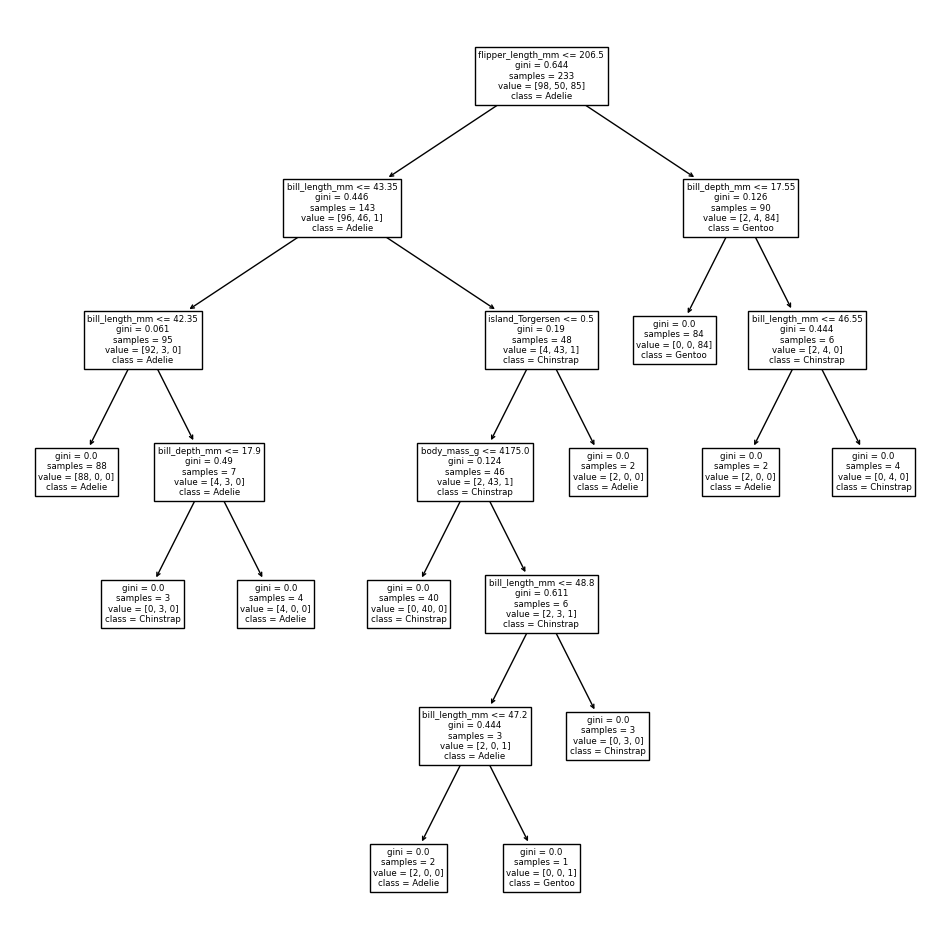

In [34]:
plt.figure(figsize=(12, 12))  # set plot size (denoted in inches)
plot_tree(clf,
          feature_names=list(X.columns),
          class_names=['Adelie', 'Chinstrap', 'Gentoo'])

We dropped 11 rows with missing values in the sex column, but it turns out that this column wasn't used. Maybe we could just drop the whole column and keep the rows that had data in the other columns. This would give us a little more data and might help to improve accuracy further.

### Gini impurity

In [35]:
from collections import Counter

def gini_impurity(values):
    """
    Calculate the Gini impurity for a list of values.
    
    Args:
    values (list): A list of categorical values.
    
    Returns:
    float: The Gini impurity of the list.
    """
    counts = Counter(values)
    total = len(values)
    impurity = 1.0

    for label in counts:
        prob_of_label = counts[label] / total
        impurity -= prob_of_label ** 2
    return impurity

In [38]:
#labels = ['Gentoo', 'Gentoo', 'Adelie', 'Chinstrap']
#labels = ['Gentoo', 'Gentoo', 'Adelie', 'Adelie']
labels = ['Gentoo', 'Gentoo', 'Gentoo', 'Gentoo']

gini_impurity(labels)

0.0